In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from abbasilab_v1dd import ARTIFACT_DIR
cell_info = pd.read_csv(ARTIFACT_DIR / "all_metrics_240503.csv")

/tmp/ipykernel_3285155/1219985974.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_info = pd.read_csv(ARTIFACT_DIR / "all_metrics_240503.csv")


In [3]:
colors = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3357FF',  # Blue
    '#F1C40F',  # Yellow
    '#9B59B6',  # Purple
    'cyan',     # Cyan, named color
    'magenta',  # Magenta, named color
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#581845',  # Dark Purple
    '#34495E',  # Asphalt
    '#16A085',  # Green Sea
    '#E74C3C',  # Red Orange
    '#2980B9',  # Belize Hole Blue
    'chocolate' # Chocolate, named color
]

color1 = '#f7fcf0'
color2 = '#e0f3db'
color3 = '#ccebc5'
color4 = '#a8ddb5'
color5 = '#7bccc4'
color6 = '#4eb3d3'
color7 = '#2b8cbe'
color8 = '#08589e'

box_colors = [color8, color7, color6, color5, color5, color4, color4, color3, color3, color2, color2, color1, color1]

mouse_colors = {'slc2': 'red', 'slc4': 'blue', 'slc5': 'orange', 'teto1': 'green'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[650, 675, 700, 725], [575, 600, 625], [500, 525, 550], [482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]


In [4]:
def make_z_data(stimuli, feature_titles, z_groups_high_to_low, mice, cell_info, plot_type):
    fontsize = 12
    plt.figure(figsize=(21, 10))

    for i, stimulus in enumerate(stimuli):
        ax = plt.subplot(1, 7, i + 1)

        data_for_stimulus = []
        mouse_data_for_stimulus = []

        for group_idx, z_group in enumerate(z_groups_high_to_low):
            every_z_data = []

            for z in z_group:
                plane = (cell_info['z'] == z)
                z_cell_info = cell_info[plane][stimulus]
                every_z_data.extend(z_cell_info.dropna().to_numpy())
            data_for_stimulus.append(every_z_data)

            mouse_data_for_current_z_group = []
            for mouse in mice:
                every_z_mouse_data = []
                for z in z_group:
                    plane = (cell_info['z']==z) & (cell_info['mouse_id'] == mouse)
                    every_z_mouse_data.extend(cell_info[plane][stimulus].dropna().to_numpy())
                mouse_data_for_current_z_group.append(np.median(every_z_mouse_data))
            mouse_data_for_stimulus.append(mouse_data_for_current_z_group)
            
        if plot_type == "violin":
            violinplot_elements = plt.violinplot(data_for_stimulus, vert=False, showmedians=True)
            for pc, color in zip(violinplot_elements['bodies'], box_colors):
                pc.set_facecolor(color)
                pc.set_edgecolor('black')
        elif plot_type == "box":
            flierprops = dict(marker='o', markerfacecolor='white', markersize=0, linestyle='none')
            boxplot_elements = plt.boxplot(data_for_stimulus, vert=False, flierprops=flierprops, patch_artist=True)
            for box, color in zip(boxplot_elements['boxes'], box_colors):
                box.set_facecolor(color)  # Set the background color
                box.set_edgecolor('black')  # Set the edge color

        for idx, group_data in enumerate(mouse_data_for_stimulus, 1):
            for mouse_idx, mouse_data in enumerate(group_data):
                if mouse_data:  # Check if there is data to plot
                    mouse = mice[mouse_idx]  # Get the mouse ID
                    color = mouse_colors.get(mouse, "black")  # Get color for the mouse, default to black if not found
                    plt.scatter(mouse_data, idx, color=color, zorder=3)  # Plot data point with the specific color
        if i == 0:
            y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]
            plt.yticks(np.arange(1, len(z_groups_high_to_low) + 1), y_tick_labels, fontsize=fontsize)
            plt.ylabel("Depth (µm)", fontsize=fontsize)
            
        elif i == len(stimuli) - 1:
            # For the last subplot, add y-ticks indicating the number of data points
            n_labels = [f"n={len(group)}" for group in data_for_stimulus]
            print(len(data_for_stimulus))
            ax.set_yticks(np.arange(1, len(z_groups_high_to_low) + 1))
            ax.set_yticklabels(n_labels, fontsize=fontsize)
            ax.yaxis.tick_right()  # Move the y-ticks to the right side
        else:
            plt.yticks([]) 

        plt.title(feature_titles[i])
        plt.xlabel("Fraction", fontsize=fontsize)
        plt.xlim([-0.05, 1.1])

    return data_for_stimulus, mouse_data_for_stimulus

/tmp/ipykernel_3285155/491793124.py:48: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


13


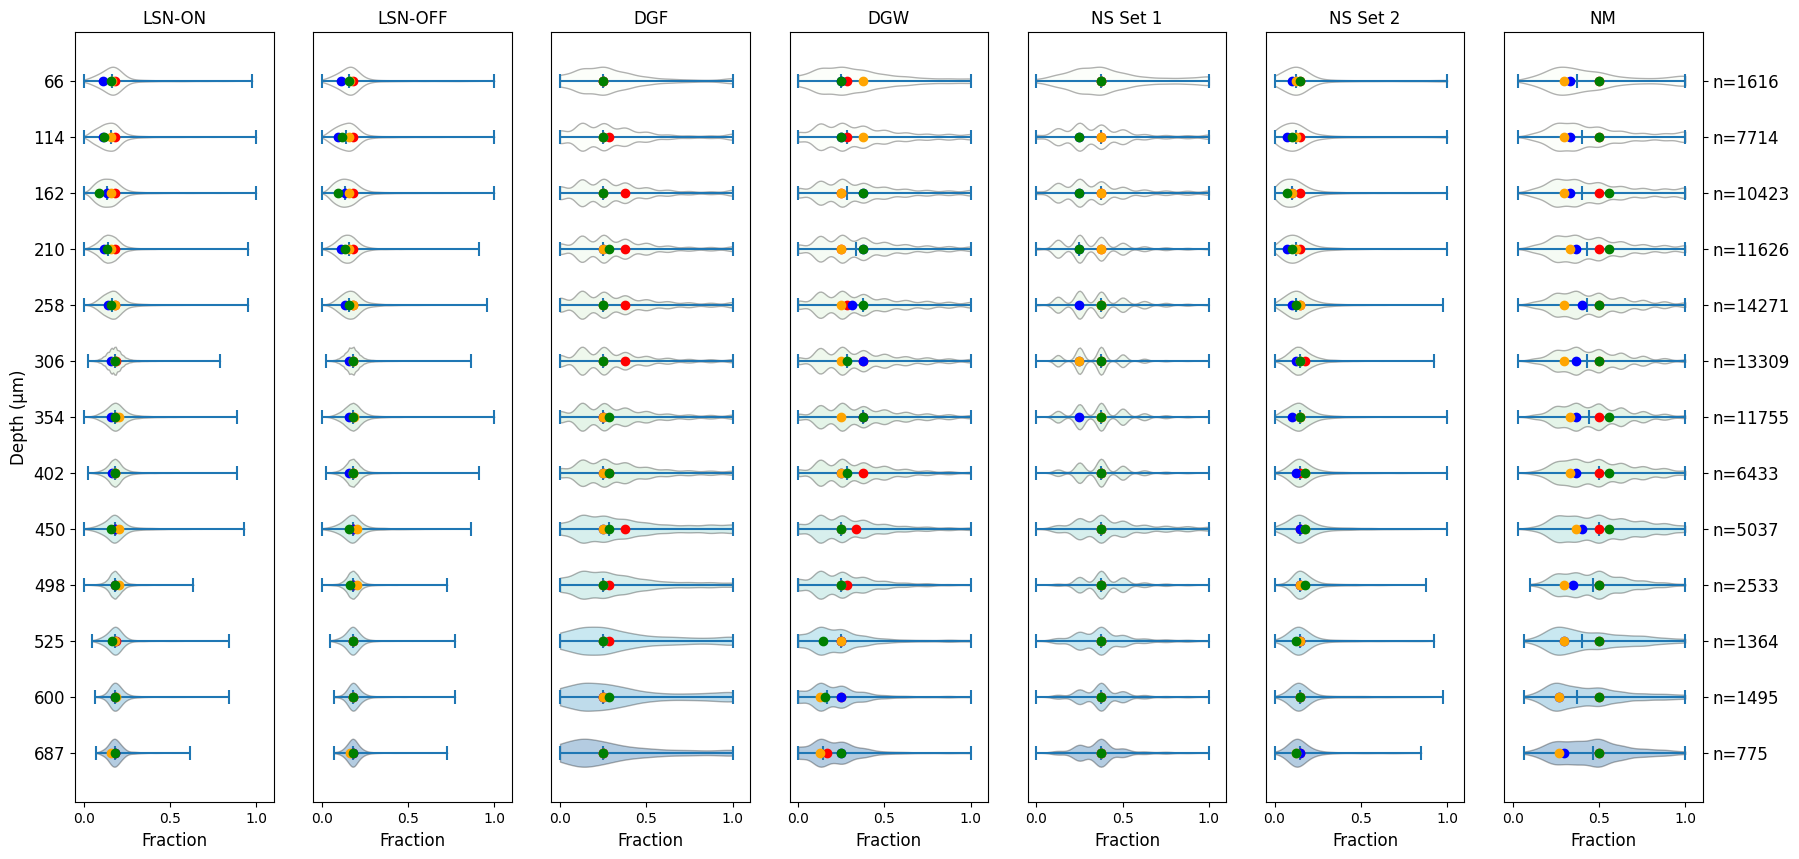

In [5]:
stimuli = ['frac_res_to_on',
        'frac_res_to_off',
        'frac_resp_full',
        'frac_resp_windowed',
        'frac_res_to_ns118',
        'frac_res_to_ns12',
        'frac_resp_natural_movie'
       ]
feature_titles = ['LSN-ON', 'LSN-OFF', 'DGF', 'DGW', 'NS Set 1', 'NS Set 2', 'NM']

# stimuli = ['frac_resp_natural_movie']
# feature_titles = ['Natural Movie']
data_for_stimulus, mouse_data_for_stimulus = make_z_data(stimuli, feature_titles, \
       z_groups_high_to_low, mice, cell_info, plot_type="violin")
plt.savefig("mean_frac_violin.eps", format='eps', dpi=1000)